# Scatterplot Smoothers

We will show how to use various scatterplot smoother classes in the MLTools `gam` (generalized additive models) module to fit a curves through a 2D scatterplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.smoothing import BinSmoother
from mltools.smoothing import KernelSmoother
from mltools.smoothing import KNNSmoother
from mltools.smoothing import PolynomialSmoother
from mltools.smoothing import BaggingSmoother
from mltools.visualization import func_plot

In [2]:
# Set NumPy random number generator seed for replicability
np.random.seed(100)

## Create Some Artificial Data

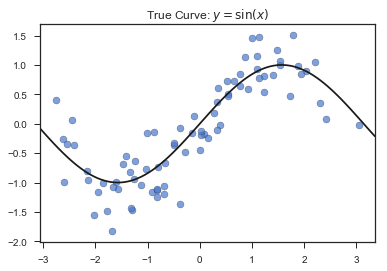

In [3]:
n = 80

# Actual model
x = np.random.normal(loc=0, scale=1.5, size=n)
e = np.random.normal(loc=0, scale=(1 / 3), size=n)
y = np.sin(x) + e

# Scatter plot of the raw data
plt.figure()
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, num=100, c="k")

plt.title("True Curve: $y = \sin(x)$")
plt.show()
plt.close()

## Polynomial Smoother

We can fit a polynomial through the scatterplot by least squares using the `PolynomialSmoother` class in the `gam` module.

In [4]:
%time
model = PolynomialSmoother(deg=3).fit(x, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 10 µs


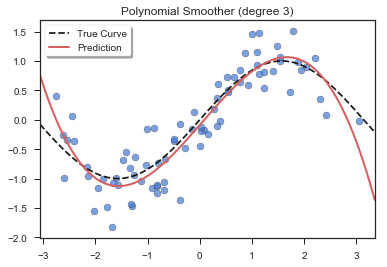

In [5]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Polynomial Smoother (degree {model.deg})")
plt.show()
plt.close()

## Bin Smoother

A *bin smoother* partitions predictor values into disjoint and exhaustive regions, called *bins*, and estimates the response by the average training data response in each bin.
Bin smoothing is implemented in the `BinSmoother` class in the `gam` module.

In [6]:
%time
model = BinSmoother(bins=10).fit(x, y)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


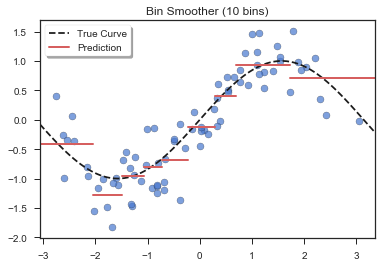

In [7]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Bin Smoother ({model.n_bins} bins)")
plt.show()
plt.close()

## $k$ Nearest Neighbors Smoother

A *$k$ nearet neighbors ($k$NN) smoother* predicts the response corresponding an input predictor $x_0$ by averaging the response for the $k$ training predictors closest to $x_0$.
$k$NN smoothing is implemented in the `KNNSmoother` class in the `gam` module.

In [8]:
%time
model = KNNSmoother(k=8).fit(x, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


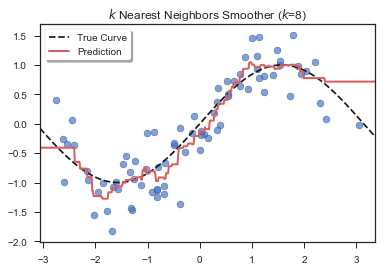

In [9]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"$k$ Nearest Neighbors Smoother ($k$={model.k})")
plt.show()
plt.close()

## Kernel Smoother

Kernel smoothing is implemented in the `KernelSmoother` class in the `gam` module.

### Gaussian Kernel

In [10]:
%time
model = KernelSmoother(kernel="gauss", bandwidth=0.3).fit(x, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


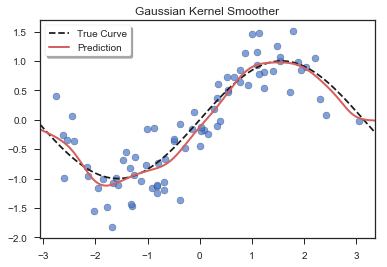

In [11]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Gaussian Kernel Smoother")
plt.show()
plt.close()

### Epanechnikov Kernel

In [12]:
%time
model = KernelSmoother(kernel="epanechnikov", bandwidth=0.6).fit(x, y)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


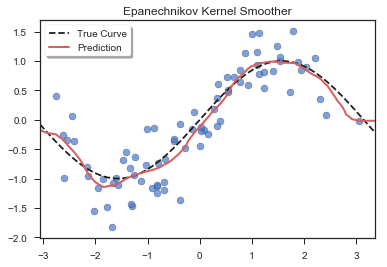

In [13]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Epanechnikov Kernel Smoother")
plt.show()
plt.close()

## Bagging Smoothers

We can apply *bagging* (*b*ootstrap *agg*regat*ing*) to any scatterplot smoother using the `BaggingSmoother` class in the `gam` module.

### Bagging Bin Smoothers

In [14]:
%%time
model = BaggingSmoother(BinSmoother, bins=10).fit(x, y, random_state=0)

CPU times: user 41.8 ms, sys: 2.1 ms, total: 43.9 ms
Wall time: 42.4 ms


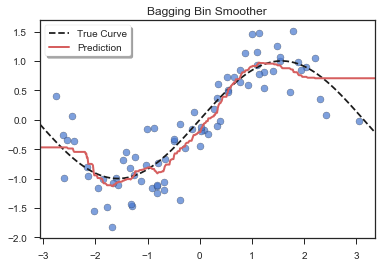

In [15]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Bagging Bin Smoother")
plt.show()
plt.close()

### Bagging $k$NN Smoothers

In [16]:
%%time
model = BaggingSmoother(KNNSmoother, k=8).fit(x, y, random_state=0)

CPU times: user 5.67 ms, sys: 1.78 ms, total: 7.44 ms
Wall time: 6.22 ms


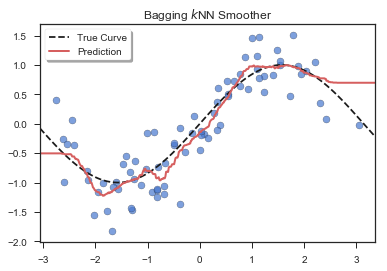

In [17]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the smoother
model.fit_plot(lw=2, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Bagging $k$NN Smoother")
plt.show()
plt.close()